##  Expected Loss

Expected Loss = PD X LGD X EAD

Banks don't really care about the loss they'll experience from a single borrower, it is negligible compared to their overall exposure, that's why we'd much rather find the total expected loss accross all accounts.

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

              precision    recall  f1-score   support

           0       0.59      0.30      0.40      4716
           1       0.61      0.84      0.71      6093

    accuracy                           0.60     10809
   macro avg       0.60      0.57      0.55     10809
weighted avg       0.60      0.60      0.57     10809



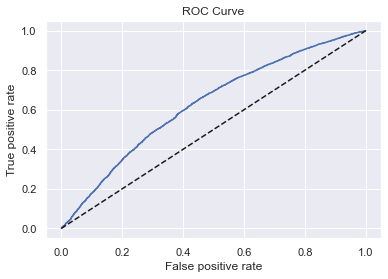

              precision    recall  f1-score   support

           0       0.61      0.36      0.45      4716
           1       0.62      0.82      0.71      6093

    accuracy                           0.62     10809
   macro avg       0.62      0.59      0.58     10809
weighted avg       0.62      0.62      0.60     10809



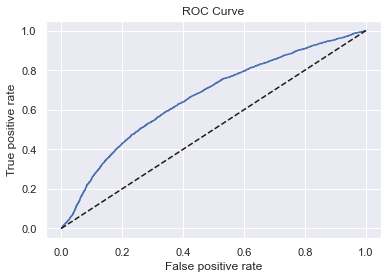

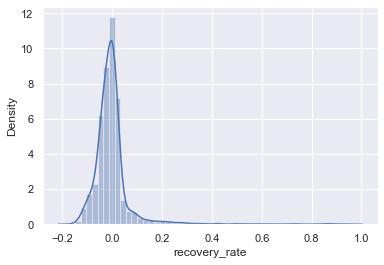

In [2]:
%run Credit_Risk_Modelling-LGD_Model_Estimation.ipynb

In [3]:
#import Models
import pickle

lgd_stg_1 = pickle.load(open('model/lgd_model_stage_1.pkl','rb'))
    
lgd_stg_2 = pickle.load(open('model/lgd_model_stage_2.pkl','rb'))

ead_model = pickle.load(open('model/ead_model.pkl','rb'))

pd_model = pickle.load(open('model/pd_model.pkl','rb'))

In [58]:
data = pd.read_parquet('loan_data/cleaned_data_with_dummies.parquet')

In [59]:
data.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1077501,1296599,5000,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,1.0,0.0,0.0,3.0,0.0,9.0,f,5000.00,861.07,0.00,0.0,5000.0,10,36,395.0,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0.0,2.0,0.0,0.0,2.0,0.0,10.0,f,2400.00,603.65,0.00,0.0,2400.0,10,36,193.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1076863,1277178,10000,10000,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0.0,1.0,35.0,0.0,10.0,0.0,37.0,f,10000.00,2209.33,0.00,0.0,10000.0,10,36,262.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0

#### LGD & EAD Models

In [60]:
# data1_features_all was created in the LGD Estimation notebook 
loan_data_preprocessed_lgd_ead = data[data1_features_all]

In [61]:
# data1_ref_cat was created in the LGD Estimation notebook 
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(data1_ref_cat, axis=1)

In [62]:
loan_data_preprocessed_lgd_ead_temp = loan_data_preprocessed_lgd_ead.copy()

In [63]:
loan_data_preprocessed_lgd_ead.shape

(466285, 46)

In [64]:
len(loan_data_preprocessed_lgd_ead.columns)

46

In [65]:
loan_data_preprocessed_lgd_ead['recovery_rate_stg_1'] = lgd_stg_1.model.predict(loan_data_preprocessed_lgd_ead_temp)

In [66]:
loan_data_preprocessed_lgd_ead['recovery_rate_stg_2'] = lgd_stg_2.predict(loan_data_preprocessed_lgd_ead_temp)

In [67]:
loan_data_preprocessed_lgd_ead['recovery_rate'] = loan_data_preprocessed_lgd_ead['recovery_rate_stg_1'] * loan_data_preprocessed_lgd_ead['recovery_rate_stg_2']

In [68]:
loan_data_preprocessed_lgd_ead['recovery_rate'] = np.where(loan_data_preprocessed_lgd_ead['recovery_rate'] < 0, 0, loan_data_preprocessed_lgd_ead['recovery_rate'])
loan_data_preprocessed_lgd_ead['recovery_rate'] = np.where(loan_data_preprocessed_lgd_ead['recovery_rate'] > 1, 1, loan_data_preprocessed_lgd_ead['recovery_rate'])

In [69]:
loan_data_preprocessed_lgd_ead['recovery_rate'].describe()

count    466285.000000
mean          0.071182
std           0.057908
min           0.000000
25%           0.000000
50%           0.091544
75%           0.121085
max           0.661482
Name: recovery_rate, dtype: float64

In [70]:
loan_data_preprocessed_lgd_ead['LGD'] = 1 - loan_data_preprocessed_lgd_ead['recovery_rate']

In [71]:
loan_data_preprocessed_lgd_ead['LGD'].describe()

count    466285.000000
mean          0.928818
std           0.057908
min           0.338518
25%           0.878915
50%           0.908456
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [72]:
loan_data_preprocessed_lgd_ead['CCF'] = ead_model.predict(loan_data_preprocessed_lgd_ead_temp)

In [73]:
loan_data_preprocessed_lgd_ead['CCF'] = np.where(loan_data_preprocessed_lgd_ead['CCF'] < 0, 0, loan_data_preprocessed_lgd_ead['CCF'])
loan_data_preprocessed_lgd_ead['CCF'] = np.where(loan_data_preprocessed_lgd_ead['CCF'] > 1, 1, loan_data_preprocessed_lgd_ead['CCF'])

In [74]:
loan_data_preprocessed_lgd_ead['EAD'] = loan_data_preprocessed_lgd_ead['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

In [75]:
loan_data_preprocessed_lgd_ead['EAD'].describe()

count    466285.000000
mean      10957.560344
std        7060.519611
min         210.852670
25%        5464.457000
50%        9314.342409
75%       14997.792894
max       34369.240010
Name: EAD, dtype: float64

In [76]:
loan_data_preprocessed_lgd_ead.head()

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,initial_list_status:w,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,total_rev_hi_lim,recovery_rate_stg_1,recovery_rate_stg_2,recovery_rate,LGD,CCF,EAD
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,0.0,3.0,0.0,9.0,0.0,5000.0,10,36,395.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5000.0,1,0.085976,0.085976,0.914024,0.546058,2730.290847
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,0.0,2500.0,0,60,224.0,72.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2500.0,1,0.085201,0.085201,0.914799,0.601844,1504.611094
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,0.0,2.0,0.0,10.0,0.0,2400.0,10,36,193.0,72.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2400.0,1,0.081004,0.081004,0.918996,0.643135,1543.523055
3,10000,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,0.0,10.0,0.0,37.0,0.0,10000.0,10,36,262.0,72.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10000.0,1,0.095865,0.095865,0.904135,0.605065,6050.648936
4,3000,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,0.0,15.0,0.0,38.0,0.0,3000.0,1,60,263.0,72.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3000.0,1,0.090416,0.090416,0.909584,0.693978,2081.933148


#### PD Model

In [23]:
pd_train = pd.read_csv('loan_data/preprocessed_train_data.csv')
pd_test = pd.read_csv('loan_data/preprocessed_test_data.csv')

In [24]:
pd_data = pd.concat([pd_train, pd_test], axis=0)

In [25]:
pd_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,purpose:sm_b_educ,purpose:ren_en_mov_house_other,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date_factor,mnths_since_issue_date:<38,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,annual_inc_factor,annual_inc:<20k,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq_factor,mths_since_last_delinq:<15,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,m

In [26]:
pd_data.shape

(466285, 271)

In [27]:
pd_data = pd_data.set_index('Unnamed: 0')

In [28]:
pd_data.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NH_WV_WY_DC_ME,addr_state:MD_OK,addr_state:NM_AR_NC_VA_NJ_LA,addr_state:MO_RI_DE_AZ_TN_ID_MI,addr_state:OH_MA_KY_UT_PA,addr_state:MN_SD_IN_GA_WA,addr_state:OR_WI,addr_state:IL_MS_CO,addr_state:VT_CT_KS_MT_SC_AK,purpose:sm_b_educ,purpose:ren_en_mov_house_other,purpose:med_vac_wedd,purpose:home_imp_maj_pur_car,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mnths_since_issue_date_factor,mnths_since_issue_date:<38,mnths_since_issue_date:38-39,mnths_since_issue_date:40-41,mnths_since_issue_date:42-48,mnths_since_issue_date:49-52,mnths_since_issue_date:53-64,mnths_since_issue_date:65-84,mnths_since_issue_date:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,annual_inc_factor,annual_inc:<20k,annual_inc:20k-30k,annual_inc:30k-40k,annual_inc:40k-50k,annual_inc:50k-60k,annual_inc:60k-70k,annual_inc:70k-80k,annual_inc:80k-90k,annual_inc:90k-100k,annual_inc:100k-120k,annual_inc:120k-150k,annual_inc:>150k,mths_since_last_delinq_factor,mths_since_last_delinq:<15,mths_since_last_delinq:15-37,mths_since_last_delinq:37-63,mths_since_last_delinq:>=63,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:140-199,mths_since_earliest_cr_line:199-270,mths_since_earliest_cr_line:270-352,mths_since_earliest_cr_line:352-434,mths_since_e

In [29]:
features_all_pd = [
 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
 'home_ownership:OWN', 'home_ownership:MORTGAGE', 'home_ownership:RENT_OTHER_NONE',
 'addr_state:NY', 'addr_state:NH_WV_WY_DC_ME', 'addr_state:MD_OK', 'addr_state:NM_AR_NC_VA_NJ_LA', 'addr_state:CA',
 'addr_state:MO_RI_DE_AZ_TN_ID_MI', 'addr_state:OH_MA_KY_UT_PA', 'addr_state:MN_SD_IN_GA_WA', 'addr_state:OR_WI',
 'addr_state:IL_MS_CO', 'addr_state:VT_CT_KS_MT_SC_AK', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Source Verified', 'verification_status:Not Verified', 'verification_status:Verified',
 'purpose:ren_en_mov_house_other', 'purpose:debt_consolidation', 'purpose:med_vac_wedd', 'purpose:home_imp_maj_pur_car',
 'purpose:sm_b_educ',
 'initial_list_status:w', 'initial_list_status:f',
 'emp_length_int:1', 'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'emp_length_int:0',
 'mnths_since_issue_date:38-39', 'mnths_since_issue_date:40-41', 'mnths_since_issue_date:42-48', 'mnths_since_issue_date:49-52',
 'mnths_since_issue_date:53-64', 'mnths_since_issue_date:65-84', 'mnths_since_issue_date:>84', 'mnths_since_issue_date:<38',
 'int_rate:9.548-12.025', 'int_rate:12.025-15.74', 'int_rate:15.74-20.281', 'int_rate:>20.281', 'int_rate:<9.548',
 'annual_inc:20k-30k', 'annual_inc:30k-40k', 'annual_inc:40k-50k', 'annual_inc:50k-60k', 'annual_inc:60k-70k',
 'annual_inc:70k-80k', 'annual_inc:80k-90k', 'annual_inc:90k-100k', 'annual_inc:100k-120k', 'annual_inc:120k-150k',
 'annual_inc:>150k', 'annual_inc:<20k',
 'mths_since_last_delinq:15-37','mths_since_last_delinq:37-63', 'mths_since_last_delinq:>=63', 'mths_since_last_delinq:<15',
 'mths_since_earliest_cr_line:140-199', 'mths_since_earliest_cr_line:199-270', 'mths_since_earliest_cr_line:270-352',
 'mths_since_earliest_cr_line:352-434', 'mths_since_earliest_cr_line:>=434', 'mths_since_earliest_cr_line:<140',
 'delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:2-3', 'delinq_2yrs:>=4',
 'inq_last_6mths:0', 'inq_last_6mths:1', 'inq_last_6mths:2-3', 'inq_last_6mths:4-6', 'inq_last_6mths:>6',
 'open_acc:3-11', 'open_acc:11-20', 'open_acc:20-25', 'open_acc:25-28', 'open_acc:>=28', 'open_acc:<3',
 'pub_rec:0', 'pub_rec:1', 'pub_rec:2-4', 'pub_rec:>4',
 'acc_now_delinq:0', 'acc_now_delinq:>=1',
 'total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25', 'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55', 
 'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90', 'total_rev_hi_lim:>=90', 'total_rev_hi_lim:<5',
 'dti:<5.5', 'dti:5.5-8.7', 'dti:8.7-14.3', 'dti:14.3-17.5', 'dti:17.5-24.7', 'dti:24.7-35', 'dti:>35',
 'mths_since_last_record:2-41', 'mths_since_last_record:41-61', 'mths_since_last_record:61-85', 'mths_since_last_record:85-118',
 'mths_since_last_record:>=118', 'mths_since_last_record:0-2'
]

In [30]:
ref_cat = [
'grade:G', 'home_ownership:RENT_OTHER_NONE', 'addr_state:ND_NE_IA_NV_FL_HI_AL','verification_status:Verified', 
 'purpose:sm_b_educ', 'initial_list_status:f', 'emp_length_int:0', 'mnths_since_issue_date:<38', 'int_rate:<9.548',
 'annual_inc:<20k', 'mths_since_last_delinq:<15', 'mths_since_earliest_cr_line:<140', 'delinq_2yrs:>=4', 'inq_last_6mths:>6',
 'open_acc:<3', 'pub_rec:>4', 'acc_now_delinq:>=1', 'total_rev_hi_lim:<5', 'dti:>35', 'mths_since_last_record:0-2'
]

In [79]:
pd_data_temp = pd_data[features_all_pd]

In [80]:
pd_data_temp = pd_data_temp.drop(ref_cat, axis=1)

In [81]:
pd_data_temp.shape

(466285, 95)

In [82]:
#drop values with Nan
pd_data_temp.drop(columns=['total_rev_hi_lim:5-16', 'total_rev_hi_lim:16-25',
       'total_rev_hi_lim:25-36', 'total_rev_hi_lim:36-55',
       'total_rev_hi_lim:55-73', 'total_rev_hi_lim:73-90',
       'total_rev_hi_lim:>=90'], inplace=True)

In [83]:
pd_data_temp.shape

(466285, 88)

In [84]:
#features to drop after feature selection
features_to_drop = [
'delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:2-3',
'open_acc:3-11', 'open_acc:11-20', 'open_acc:20-25', 'open_acc:25-28', 'open_acc:>=28',
'pub_rec:0', 'pub_rec:1', 'pub_rec:2-4', 'acc_now_delinq:0',
'mths_since_last_record:2-41', 'mths_since_last_record:41-61',
'mths_since_last_record:61-85', 'mths_since_last_record:85-118',
'mths_since_last_record:>=118'
]

In [85]:
pd_data_temp = pd_data_temp.drop(features_to_drop, axis=1)

In [86]:
pd_data_temp.shape

(466285, 71)

In [87]:
pd_data['PD'] = pd_model.model.predict_proba(pd_data_temp)[:][: , 0]

In [88]:
pd_data['PD'].head()

Unnamed: 0
456615    0.162097
451541    0.626867
394474    0.631897
110294    0.245185
139343    0.501137
Name: PD, dtype: float64

In [89]:
pd_data['PD'].describe()

count    466285.000000
mean          0.453508
std           0.172200
min           0.057763
25%           0.324358
50%           0.455878
75%           0.584212
max           0.951478
Name: PD, dtype: float64

In [93]:
loan_data_preprocessed = pd.concat([loan_data_preprocessed_lgd_ead, pd_data], axis=1)

In [94]:
loan_data_preprocessed['EL'] = loan_data_preprocessed['PD'] * loan_data_preprocessed['LGD'] * loan_data_preprocessed['EAD']

In [95]:
loan_data_preprocessed['EL'].describe()

count    466285.000000
mean       4526.753936
std        3545.870786
min          67.981620
25%        1943.163354
50%        3404.015128
75%        6150.990655
max       25281.953046
Name: EL, dtype: float64

In [96]:
loan_data_preprocessed[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']]

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.624672,0.914024,2730.290847,1558.901348
1,2500,2500,0.752668,0.914799,1504.611094,1035.984977
2,2400,2400,0.702543,0.918996,1543.523055,996.550648
3,10000,10000,0.692104,0.904135,6050.648936,3786.223012
4,3000,3000,0.529679,0.909584,2081.933148,1003.049889
...,...,...,...,...,...,...
466280,18400,18400,0.467372,0.854916,15809.544382,6316.919407
466281,22000,22000,0.647228,1.000000,19717.318168,12761.596184
466282,20700,20700,0.671333,1.000000,16818.920907,11291.094684
466283,2000,2000,0.176905,0.869513,1380.362169,212.329039


In [97]:
loan_data_preprocessed['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [98]:
#portfolio level
loan_data_preprocessed['EL'].sum()

2110757459.1647096

In [100]:
loan_data_preprocessed['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [99]:
loan_data_preprocessed['EL'].sum()/ loan_data_preprocessed['funded_amnt'].sum()

funded_amnt    0.316738
funded_amnt    0.316738
dtype: float64

A bank usually holds 10% of its assets as capital therefore the expected loss on it's loan portfolio should be less than its capital. Observed expected loss are anywhere between 2% and 10%, depending on this exposure, the bank management can decide to be more aggressive or more conservative when giving out loans in the future.

In [101]:
X_train_get_dummy_columns = ['preferred_channel_Card', 'preferred_channel_Mobile', 'preferred_channel_RIB', 'preferred_channel_USSD', 
                    'Generation_Generation Alpha', 'Generation_Generation X', 'Generation_Generation Z', 'Generation_Millenials', 'Generation_Retirees', 'preferred_channel_OTHERS']